<a href="https://colab.research.google.com/github/yashraj077/Basic-ML-Projects/blob/master/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv
# https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv

--2020-09-05 10:30:47--  https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zpjqx685em4hllf/ratings.csv [following]
--2020-09-05 10:30:47--  https://www.dropbox.com/s/raw/zpjqx685em4hllf/ratings.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc07d0c01250061a7591235a9864.dl.dropboxusercontent.com/cd/0/inline/A-xMZwdbEgVYPwo95BZGWy102t_NCxtx3E9PwB0SdI3j0BL-0vehg5OUG67Z1fwpYMSVTCd78c5rYIx-0nOfAvCMfFEL8eD1MgTvsbrNJchQ5OUodNlyFbisbS4zPigklzM/file# [following]
--2020-09-05 10:30:48--  https://uc07d0c01250061a7591235a9864.dl.dropboxusercontent.com/cd/0/inline/A-xMZwdbEgVYPwo95BZGWy102t_NCxtx3E9PwB0SdI3j0BL-0vehg5OUG67Z1fwpYMSVTCd78c5rYIx-0nOfAvCMfFEL8eD1MgTvsbrNJchQ5OUodNlyF

In [ ]:
import pandas as pd
rating_details = pd.read_csv('ratings.csv')
# Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
rating_details.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
!wget https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv

--2020-09-05 10:30:49--  https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9vk3xh99pt5f27l/movies.csv [following]
--2020-09-05 10:30:49--  https://www.dropbox.com/s/raw/9vk3xh99pt5f27l/movies.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1eea7004ee84ad1302782e927.dl.dropboxusercontent.com/cd/0/inline/A-wulE8zWhEXAvJyLG7Yiis9_1s8Mnr7JJkOlkz0ax6GfMhnTE0XfM66efAZ3fcfUzUVY7uWb7xhTWhWcnAgOWJn9xLH8knfGcAzpF-fSU2-lcbaKRkxWz8js5FxKjpwgks/file# [following]
--2020-09-05 10:30:49--  https://uce1eea7004ee84ad1302782e927.dl.dropboxusercontent.com/cd/0/inline/A-wulE8zWhEXAvJyLG7Yiis9_1s8Mnr7JJkOlkz0ax6GfMhnTE0XfM66efAZ3fcfUzUVY7uWb7xhTWhWcnAgOWJn9xLH8knfGcAzpF-fSU2-lcbaKRkxWz8j

In [ ]:
movies_details = pd.read_csv('movies.csv')
# Index(['movieId', 'title', 'genres'], dtype='object')
movies_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating_details.shape

(100836, 4)

In [ ]:
movies_details.shape

(9742, 3)

In [ ]:
rating_details.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
movies_details.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [ ]:
# merging movies_details, rating_details on basis of movieId
dataset = pd.merge(rating_details, movies_details, on='movieId')
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
from datetime import datetime, date
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset.head()
# dataset.shape

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1970-01-01 00:00:00.964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1970-01-01 00:00:00.847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1970-01-01 00:00:01.106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1970-01-01 00:00:01.510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1970-01-01 00:00:01.305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# to check unique datapoints in dataset
dataset.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
dtype: int64

In [ ]:
dataset.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:
# grouping data to get average rating of each movie
a = dataset
a = a.groupby('title')['rating'].mean()
a.head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [ ]:
# sorting movies in descending order of their ratings
sorted_ratings_wise_movie = a.sort_values(ascending = False)
sorted_ratings_wise_movie

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [ ]:
# total number of ratings for particular movie
b = dataset.groupby('title')['rating'].count()
b

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [ ]:
# creating a new record for particular movies avg. rating and number of ratings
new_record = pd.DataFrame()
new_record['Average_rating'] = a
new_record['Count of total ratings'] = b
new_record

,Average_rating,Count of total ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [ ]:
# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# checking columns of new record/dataframework
new_record.keys()

Index(['Average_rating', 'Count of total ratings'], dtype='object')

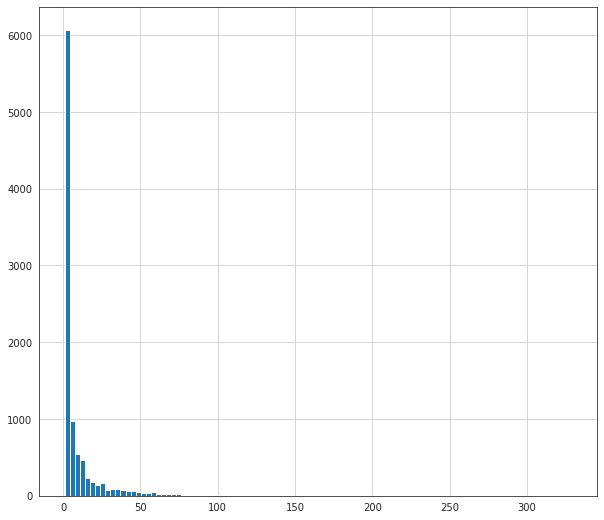

In [ ]:
plt.figure(figsize=(10, 9))
new_record['Count of total ratings'].hist(bins=100)
# most movies received rating count less than 50

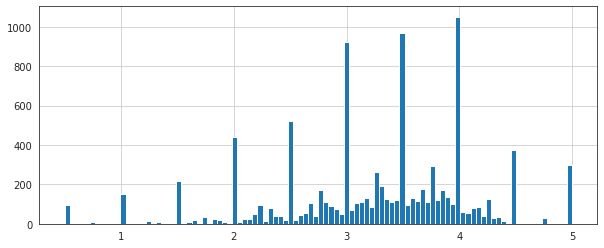

In [ ]:
plt.figure(figsize=(10, 4))
new_record['Average_rating'].hist(bins=100)

<Figure size 576x432 with 0 Axes>

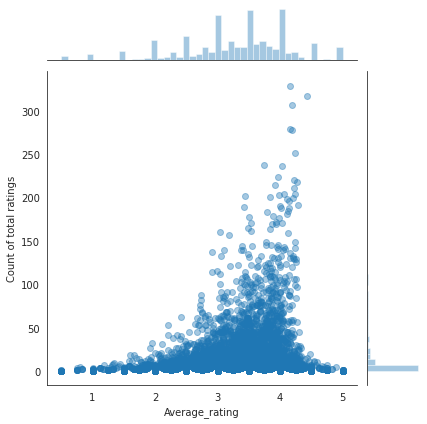

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'Average_rating', y='Count of total ratings', data=new_record, alpha=0.4)

In [ ]:
# sorting values according to the "num of rating column"
# creating pivot table
moviematrix = dataset.pivot_table(index='userId', columns='title', values='rating')
# moviematrix.head()
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [ ]:
# gathering ratings of each user of a particular movie
moviematrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), Length: 610, dtype: float64

In [ ]:
xXx_2002_ratings = moviematrix['xXx (2002)']
xXx_2002_ratings.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

In [ ]:
# finding similar movies to above
movies_similar_to_xXx2002 = moviematrix.corrwith(xXx_2002_ratings)
movies_similar_to_xXx2002

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

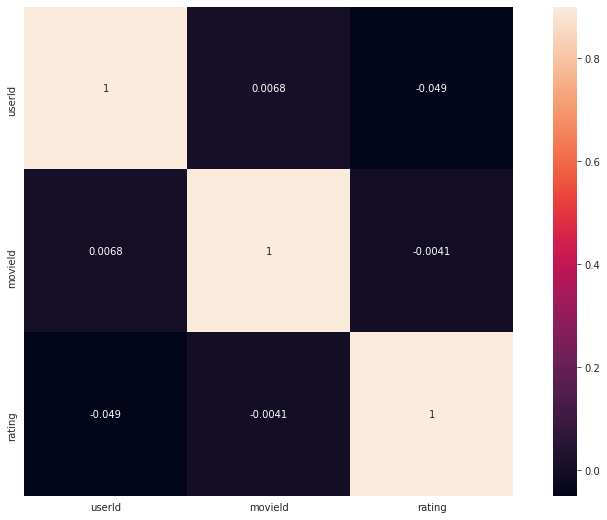

In [ ]:
correlation_metrics = dataset.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_metrics, annot = True, vmax = .9, square = True)
plt.show()

In [ ]:
xXx_2002_corr = pd.DataFrame(movies_similar_to_xXx2002, columns=['Correlation'])
xXx_2002_corr.dropna(inplace=True)
xXx_2002_corr

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
...,...
[REC]² (2009),-1.000000
eXistenZ (1999),0.762493
xXx (2002),1.000000
